In [3]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#quick cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
import seaborn as sns

In [5]:
#only data analysts from US 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#dropping NaN values from 'salary_year_avg'
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

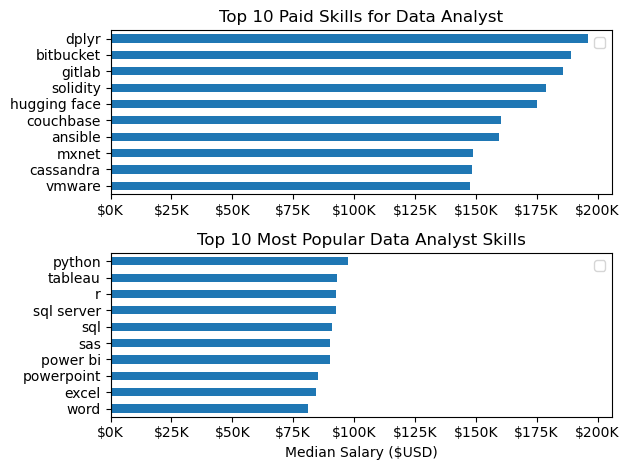

In [6]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

### MATPLOTLIB VERSION of the graph

fig, ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0])
ax[0].invert_yaxis() #option one for reversing the order
ax[0].set_title('Top 10 Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1]) 
            #option two for reversing the order
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most Popular Data Analyst Skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].legend('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()

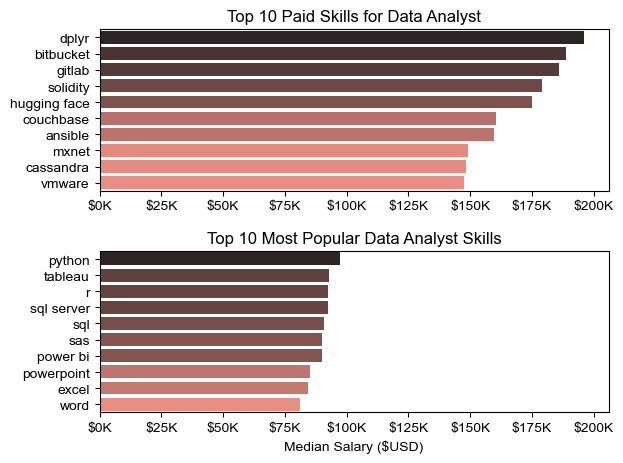

In [7]:
### SEABORN VERSION of the graph

fig, ax = plt.subplots(2,1)


sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], legend=False, hue='median', palette ='dark:salmon_r')
# df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0])
# ax[0].invert_yaxis() #option one for reversing the order
ax[0].set_title('Top 10 Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], legend=False, hue='median', palette = 'dark:salmon_r')
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1]) 
            #option two for reversing the order
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most Popular Data Analyst Skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

### sns.color_palette('dark:salmon_r', as_cmap=True) works but it can be also put in the brackets as 'palette'
sns.set_theme(style = 'ticks')
fig.tight_layout()

Text(0, 0.5, 'Number of Jobs')

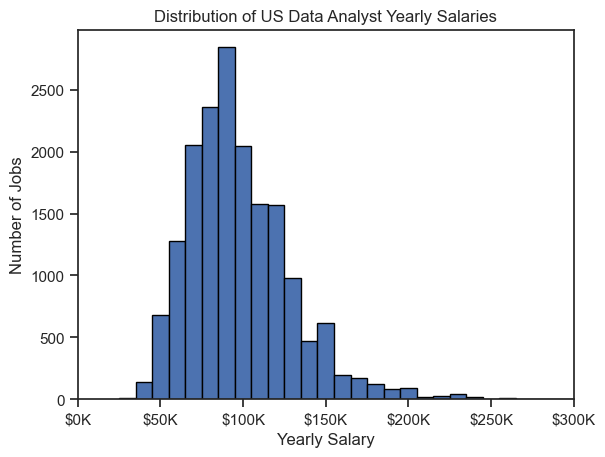

In [8]:
df_DA_US['salary_year_avg'].plot(kind='hist', edgecolor='black', bins=35)
plt.xlim(0,300000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

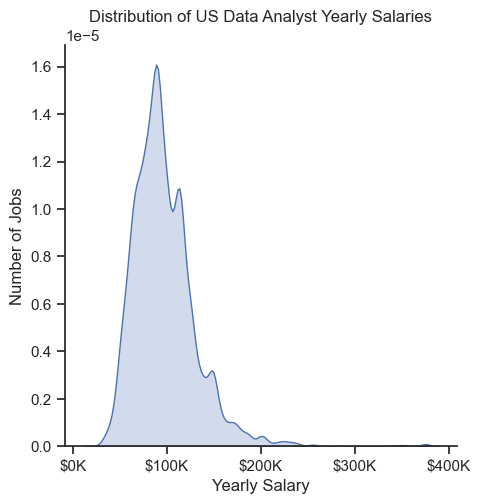

In [12]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
sns.set_theme(style='ticks')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

C:\Users\jarzy\AppData\Local\Temp\ipykernel_1364\3522939852.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


(0.0, 600000.0)

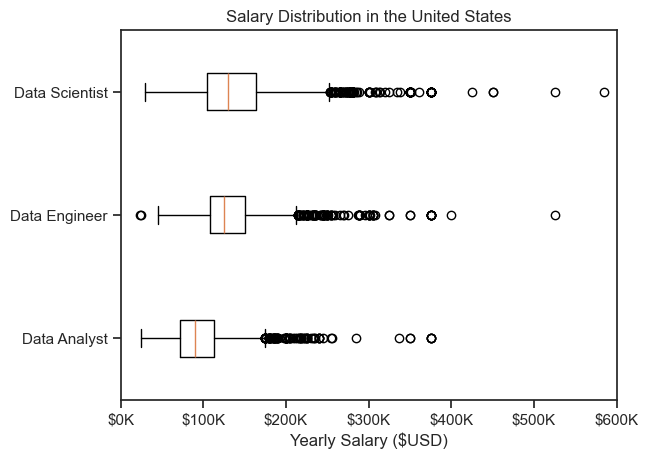

In [14]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)


(0.0, 600000.0)

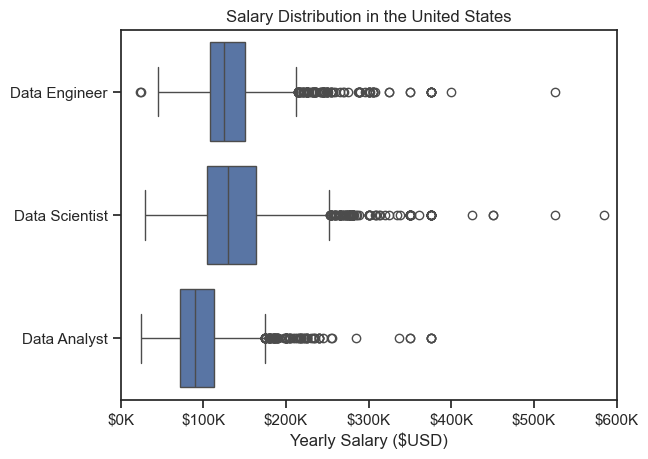

In [18]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)

### END OF SEABORN 
---